# Initialisation

In [1]:
# Import libraries and dependencies
import ccxt
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import talib as ta

from Utility_Functions import Functions

### Import Environment Variables

In [2]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'str'>
Kraken secren data type: <class 'str'>


### Set Public and private keys and initialise the CCXT Exchange object

In [3]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

if not exchange.has['fetchOHLCV']:
    print('Cant load history data with this exchange. Try with a different exchange')

# Fetching the price data

In [4]:
currs_list = ['ETH/AUD', 'XRP/AUD' , 'LTC/AUD', 'ADA/AUD', 'XLM/AUD', 'BCH/AUD']     #

dict_ohlcv = {}

for curr in currs_list:
    
    # Call data fetch
    ohlcv = exchange.fetchOHLCV(curr, '1h')

    # Store the values in a dataframe
    df_ohlcv = pd.DataFrame(ohlcv, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume']).set_index('Date')
    df_ohlcv.index = pd.to_datetime(df_ohlcv.index, unit='ms')

    df_ohlcv.dropna(inplace=True)

    # Store the symbol name and history data in a dict 
    dict_ohlcv[curr] = df_ohlcv 

    start_date = df_ohlcv.index[0].date().isoformat()
    end_date = df_ohlcv.index[-1].date().isoformat()
    num_records = (len(df_ohlcv))
    start_price = df_ohlcv.iloc[0]['Close']
    end_price = df_ohlcv.iloc[-1]['Close']

    print(f'Data summary for {curr}')
    print(f'    Start Date: {start_date}; End Date: {end_date}; NUmber of records: {num_records}')
    print(f'    Start Price: {start_price}; End Price: {end_price}')    
    print(f'Data for {curr} fetched and appended into the dictionary\n')

Data summary for ETH/AUD
    Start Date: 2021-07-31; End Date: 2021-08-30; NUmber of records: 720
    Start Price: 3318.27; End Price: 4326.18
Data for ETH/AUD fetched and appended into the dictionary

Data summary for XRP/AUD
    Start Date: 2021-07-31; End Date: 2021-08-30; NUmber of records: 720
    Start Price: 1.00931; End Price: 1.54164
Data for XRP/AUD fetched and appended into the dictionary

Data summary for LTC/AUD
    Start Date: 2021-07-31; End Date: 2021-08-30; NUmber of records: 720
    Start Price: 197.25; End Price: 236.88
Data for LTC/AUD fetched and appended into the dictionary

Data summary for ADA/AUD
    Start Date: 2021-07-31; End Date: 2021-08-30; NUmber of records: 720
    Start Price: 1.77469; End Price: 3.85834
Data for ADA/AUD fetched and appended into the dictionary

Data summary for XLM/AUD
    Start Date: 2021-07-31; End Date: 2021-08-30; NUmber of records: 720
    Start Price: 0.37725; End Price: 0.47295
Data for XLM/AUD fetched and appended into the dict

# Computing and adding Technical Indicators to the price data

In [5]:
fast_window = 5
slow_window = 15

df_all_data = pd.DataFrame() 
for curr, data in dict_ohlcv.items():

    df = Functions.add_tech_indicators(data, fast_window, slow_window)
    
    df['Currency'] = curr 
    df['Returns'] = df['Close'].pct_change()

    df.dropna(inplace=True)    
    df_all_data = df_all_data.append(df)

df_all_data.shape

(4201, 17)

In [6]:
df_all_data

,Open,High,Low,Close,Volume,SMA_agg,RSI_ratio,CCI,MACD_ratio,ADX,ADX_dirn,ATR_ratio,BBands_high,BBands_low,SMA_vol_agg,Currency,Returns
Date,,,,,,,,,,,,,,,,,
2021-08-01 00:00:00,3460.71,3500.00,3459.17,3500.00,2.184250,1.018780,1.135465,75.114051,2.779747,72.587859,1.0,1.377363,1.001070,1.030602,2.271044,ETH/AUD,0.003555
2021-08-01 01:00:00,3506.88,3506.88,3486.00,3495.35,3.057361,1.024240,1.099358,90.814895,1.998455,77.244909,1.0,1.300361,1.001057,1.010355,2.518512,ETH/AUD,-0.001329
2021-08-01 02:00:00,3498.48,3510.53,3498.48,3510.53,2.019484,1.024021,1.100536,107.266623,1.650041,81.011830,1.0,1.210001,0.998935,1.009620,2.519904,ETH/AUD,0.004343
2021-08-01 03:00:00,3523.92,3560.14,3519.76,3560.14,1.150725,1.024455,1.092088,152.825836,1.580243,84.385565,1.0,1.306732,0.993366,1.021583,2.352702,ETH/AUD,0.014132
2021-08-01 04:00:00,3569.38,3597.74,3569.38,3572.36,0.404101,1.024072,1.089111,117.726976,1.462442,87.213096,1.0,1.308853,0.996480,1.021969,2.305781,ETH/AUD,0.003432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30 00:00:00,929.99,929.99,929.99,929.99,0.000000,1.000000,0.805696,0.000000,0.452873,22.360188,1.0,0.113700,1.000000,1.000000,0.969492,BCH/AUD,0.000000
2021-08-30 01:00:00,929.99,929.99,929.99,929.99,0.000000,1.000000,0.805696,0.000000,0.448990,22.124381,1.0,0.098540,1.000000,1.000000,0.969492,BCH/AUD,0.000000
2021-08-30 02:00:00,929.99,929.99,929.99,929.99,0.000000,1.000000,0.805696,0.000000,0.445580,21.935736,1.0,0.085401,1.000000,1.000000,0.969492,BCH/AUD,0.000000


<AxesSubplot:xlabel='Date'>

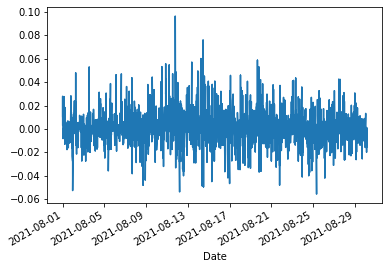

In [7]:
df_all_data.Returns.plot()

In [8]:
df_all_data.to_csv('Resources/Testing_data.csv')